# DATA ANALYSE

## Nettoyage des données

### Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [2]:
df = pd.read_csv('../csv/donnees.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Valeurs manquantes

In [3]:
df['smoker'] = df['smoker'].apply(lambda x : 'Oui' if x == "yes" else "Non")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,Oui,southwest,16884.92400
1,18,male,33.770,1,Non,southeast,1725.55230
2,28,male,33.000,3,Non,southeast,4449.46200
3,33,male,22.705,0,Non,northwest,21984.47061
4,32,male,28.880,0,Non,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,Non,northwest,10600.54830
1334,18,female,31.920,0,Non,northeast,2205.98080
1335,18,female,36.850,0,Non,southeast,1629.83350
1336,21,female,25.800,0,Non,southwest,2007.94500


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Doublons

In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,Non,northwest,1639.5631


In [6]:
df.drop_duplicates(inplace=True)

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,Oui,southwest,16884.92400
1,18,male,33.770,1,Non,southeast,1725.55230
2,28,male,33.000,3,Non,southeast,4449.46200
3,33,male,22.705,0,Non,northwest,21984.47061
4,32,male,28.880,0,Non,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,Non,northwest,10600.54830
1334,18,female,31.920,0,Non,northeast,2205.98080
1335,18,female,36.850,0,Non,southeast,1629.83350
1336,21,female,25.800,0,Non,southwest,2007.94500


### Données érronnées

In [7]:
df['age'].unique().dtype

dtype('int64')

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['bmi'].unique().dtype

dtype('float64')

In [10]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [11]:
df['smoker'].unique()

array(['Oui', 'Non'], dtype=object)

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df['charges'].unique().dtype

dtype('float64')

### Valeurs Abérrantes

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


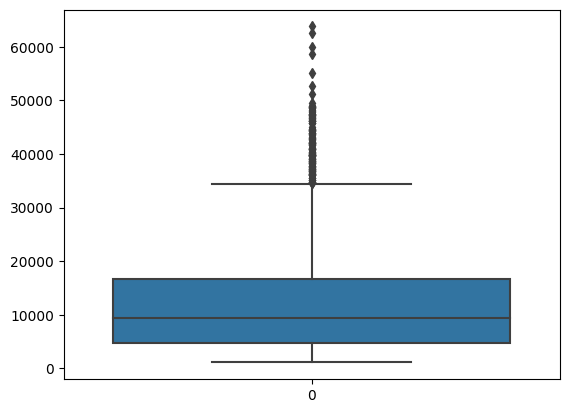

In [15]:
sns.boxplot(df['charges'])
plt.show()

In [16]:
test = df[df['charges']>35000]

test

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,Oui,southeast,39611.75770
19,30,male,35.300,0,Oui,southwest,36837.46700
23,34,female,31.920,1,Oui,northeast,37701.87680
29,31,male,36.300,2,Oui,southwest,38711.00000
30,22,male,35.600,0,Oui,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,Oui,southeast,62592.87309
1301,62,male,30.875,3,Oui,northwest,46718.16325
1303,43,male,27.800,0,Oui,southwest,37829.72420
1313,19,female,34.700,2,Oui,southwest,36397.57600


In [17]:
test['smoker'].value_counts()

Oui    130
Non      3
Name: smoker, dtype: int64

In [18]:
test[test['smoker'] == 'no']

,age,sex,bmi,children,smoker,region,charges


In [19]:
masques = [test['bmi'] > 40, test['age'] > 50, test['children'] != 0]

combo_mask = masques[0]

for masque in masques:
    combo_mask += masque

test2 = test[combo_mask]

test.drop(test2.index, axis=0)

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.300,0,Oui,southwest,36837.46700
30,22,male,35.600,0,Oui,southwest,35585.57600
53,36,male,34.430,0,Oui,southeast,37742.57570
158,30,male,35.530,0,Oui,southeast,36950.25670
161,18,female,36.850,0,Oui,southeast,36149.48350
203,27,female,36.080,0,Oui,southeast,37133.89820
254,50,male,31.825,0,Oui,northeast,41097.16175
263,19,male,36.955,0,Oui,northwest,36219.40545
322,34,male,30.800,0,Oui,southwest,35491.64000
441,33,female,33.500,0,Oui,southwest,37079.37200


### Arrondir les floats

In [20]:
df['bmi'] = df['bmi'].apply(lambda x : round(x, 1))
df['charges'] = df['charges'].apply(lambda x : round(x, 2))

In [21]:
df.to_csv('../csv/donnees_clean.csv')

## Analyses Univariées

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,Non,northwest,10600.55
1334,18,female,31.9,0,Non,northeast,2205.98
1335,18,female,36.9,0,Non,southeast,1629.83
1336,21,female,25.8,0,Non,southwest,2007.94


### Âge des usagers

In [23]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

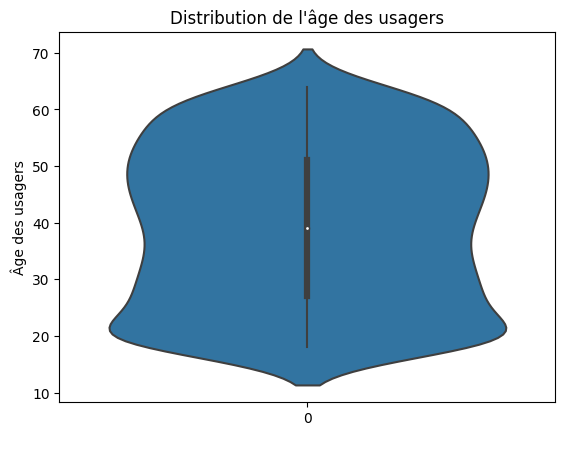

In [24]:
sns.violinplot(df['age'])
plt.title('Distribution de l\'âge des usagers')
plt.xlabel(' ')
plt.ylabel('Âge des usagers')
plt.show()

### Sexe des usagers

<AxesSubplot: ylabel='sex'>

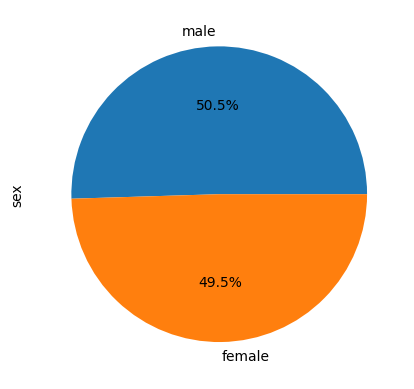

In [25]:
df['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%.1f%%')

### BMI des usagers

In [26]:
df['bmi'].describe()

count    1337.000000
mean       30.663500
std         6.100584
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

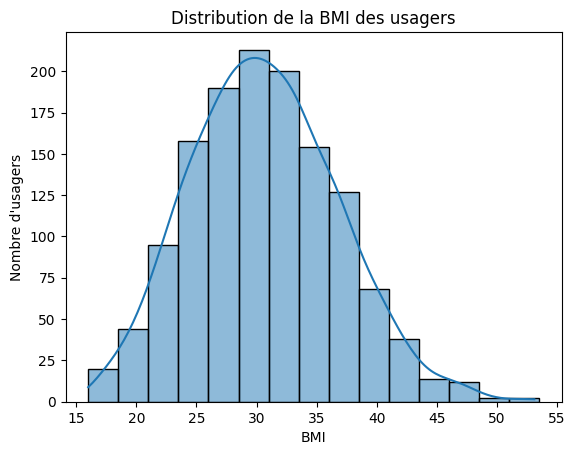

In [27]:
sns.histplot(df['bmi'], binwidth=2.5, stat='count', kde=True)
plt.title('Distribution de la BMI des usagers')
plt.xlabel('BMI')
plt.ylabel('Nombre d\'usagers')
plt.show()

### Enfants des usagers

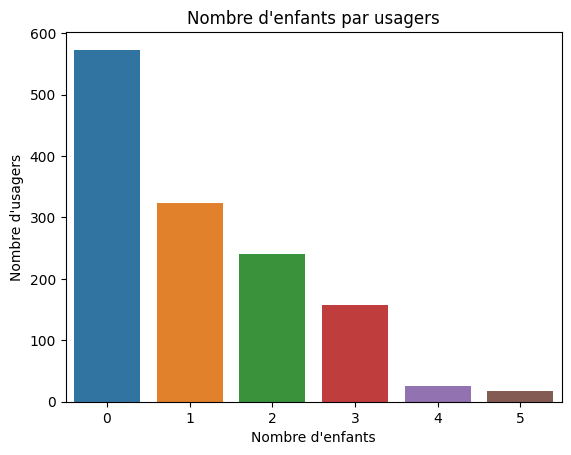

In [28]:
child = pd.DataFrame(df['children'].value_counts())
sns.barplot(child, y='children', x=child.index)
plt.title('Nombre d\'enfants par usagers')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Nombre d\'usagers')
plt.show()

### Répartition des fumeurs ou et non-fumeurs

<AxesSubplot: ylabel='smoker'>

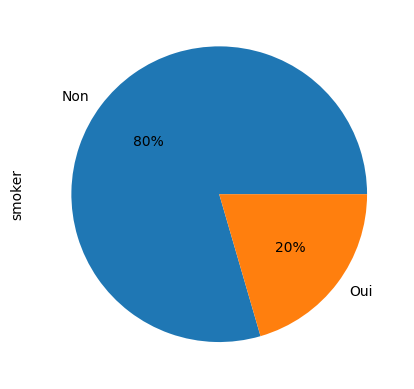

In [29]:
df['smoker'].value_counts(normalize=True).plot(kind='pie', autopct='%.0f%%')

### Régions des usagers

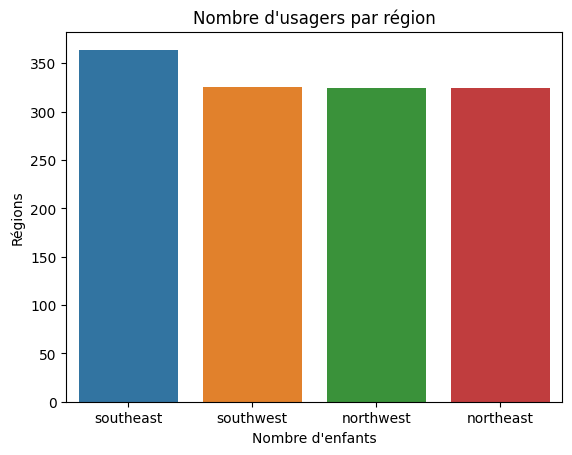

In [30]:
region = pd.DataFrame(df['region'].value_counts())
sns.barplot(region, y='region', x=region.index)
plt.title('Nombre d\'usagers par région')
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Régions')
plt.show()

### Prime d'assurance des usagers

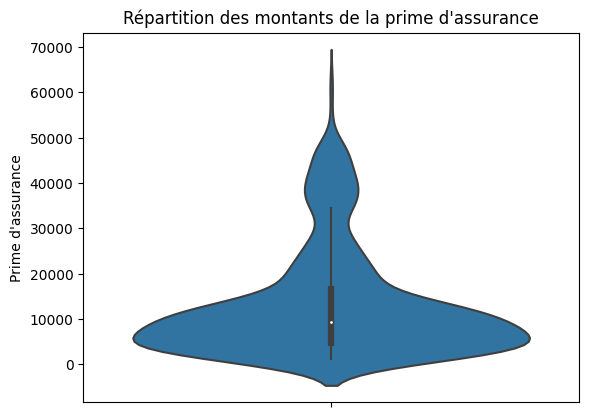

In [31]:
sns.violinplot(df, y='charges')
plt.title('Répartition des montants de la prime d\'assurance')
plt.ylabel('Prime d\'assurance')
plt.show()

## Corrélation de chaque variable avec la prime d'assurance.

In [32]:
correlation = df.corr()
correlation = pd.DataFrame(correlation['charges'])
correlation = correlation.iloc[:3,:]

correlation

/tmp/ipykernel_59715/473104442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,charges
age,0.298308
bmi,0.198641
children,0.067389


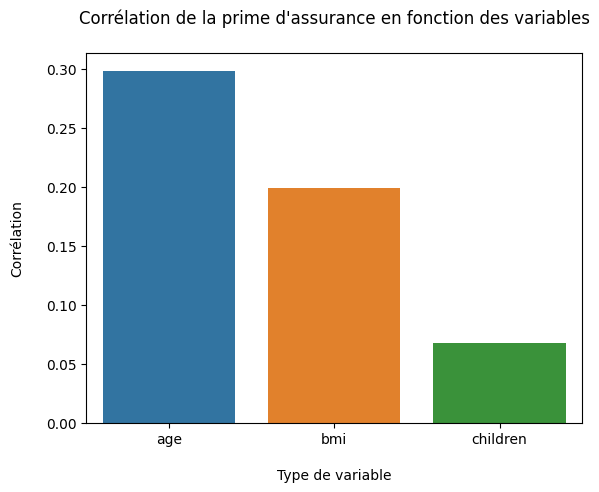

In [35]:
sns.barplot(correlation, y='charges', x=correlation.index)
plt.title('Corrélation de la prime d\'assurance en fonction des variables\n')
plt.xlabel('\nType de variable')
plt.ylabel('Corrélations\n')
plt.show()

## Analyses Bivariées

### Pairplot en fonction du sexe

In [ ]:
sns.pairplot(df, hue='sex')
plt.show()

### Pairplot en fonction de fumeur ou non

In [ ]:
sns.pairplot(df, hue='smoker')
plt.show()

### Pairplot en fonction de la région

In [ ]:
sns.pairplot(df, hue='region')
plt.show()